# 특성 추가
- 평균, 분산, 최대치, 피크치 등을 추가하는 방법

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
import matplotlib
matplotlib.rcParams['figure.figsize'] = (6,4)
matplotlib.rcParams.update({'font.size': 1})

## 데이터 읽기

(108, 2)


,Month,Sales
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026
3,1960-04,14395
4,1960-05,14587


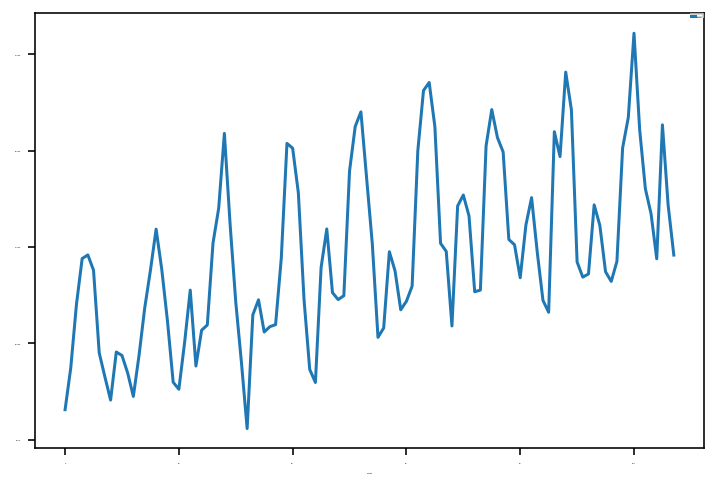

In [2]:
## 자동차 판매 데이터 읽기

# data = pd.read_csv("https://raw.githubusercontent.com/StillWork/data/master/car_sales.csv")
data = pd.read_csv("car_sales.csv")
print(data.shape)

data.plot()
plt.xlabel('Month')
plt.savefig('p319.pdf')

data[:5]

## 이동평균, 이동분산 추가하기

In [3]:
## 특성 추가하기

df = data.copy()
df['6-mean'] = df['Sales'].rolling(6, min_periods=1).mean()
df['7-std'] = df['Sales'].rolling(8, min_periods=1).std().fillna(0)
df[:8]

,Month,Sales,6-mean,7-std
0,1960-01,6550,6550.000000,0.000000
1,1960-02,8728,7639.000000,1540.078569
2,1960-03,12026,9101.333333,2757.023274
3,1960-04,14395,10424.750000,3474.647932
4,1960-05,14587,11257.200000,3538.325692
5,1960-06,13791,11679.500000,3329.537911
6,1960-07,9498,12170.833333,3149.291107
7,1960-08,8251,12091.333333,3116.973246


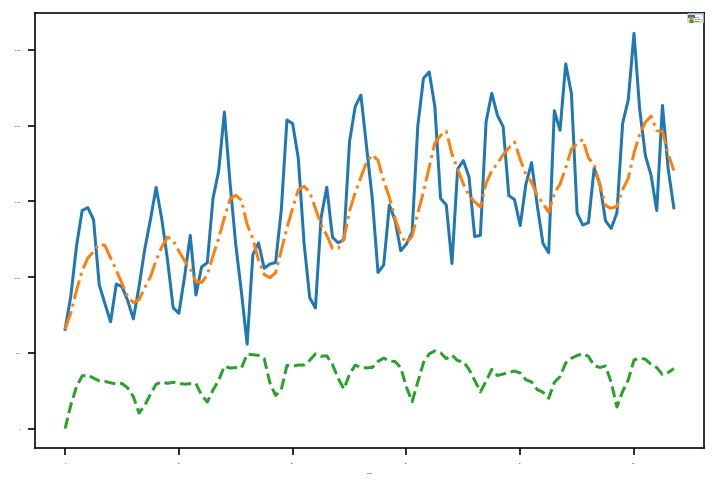

In [4]:
## 추가한 특성 그리기

plt.plot(df['Sales'], label='Sales', ls='-')
plt.plot(df['6-mean'], label='6-mean', ls='-.')
plt.plot(df['7-std'], label='7-std', ls='--')
plt.xlabel("Month")

plt.legend()
plt.savefig('p321.pdf')


# 피크 발생 찾기

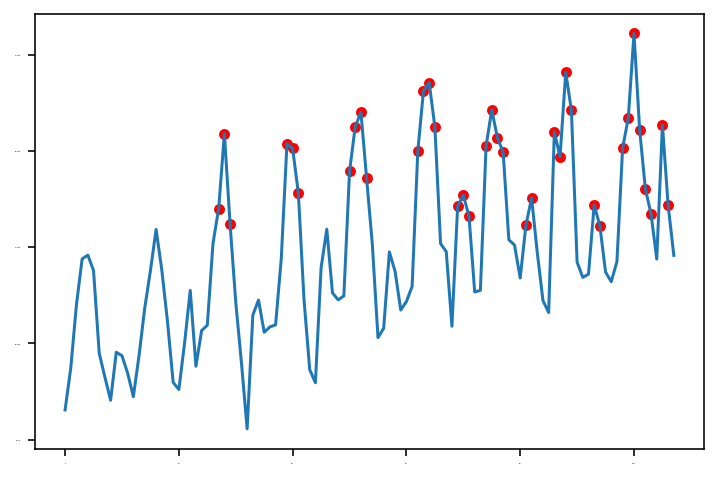

In [5]:
## 피크 발생 찾기

df['peak-16'] = df['Sales'][df['Sales'] > 16000]
plt.plot(df.Sales)
plt.scatter(range(len(df)), df['peak-16'],c='r', s=20)

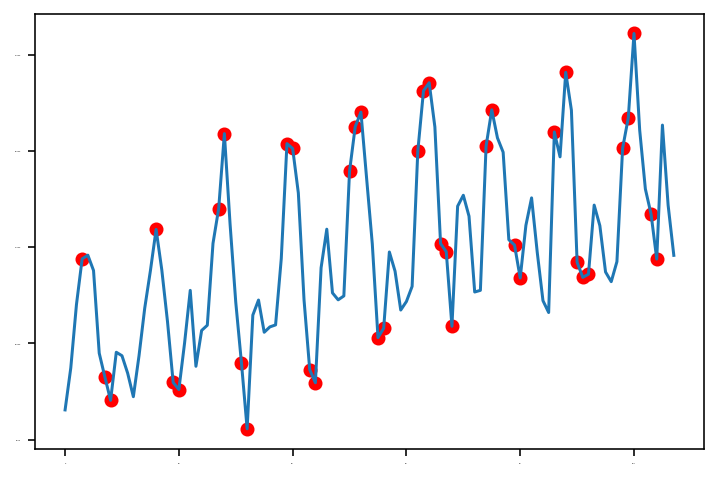

In [6]:
## 평균값을 기준으로 한 피크 발생 찾기

df['peak-average'] = df['Sales'][np.abs(df['Sales']-df['6-mean']) > 3800]
plt.plot(df.Sales)
plt.scatter(range(len(df)), df['peak-average'],c='r')

## 일정 구간 동안 피크 수 세기

Text(0.5, 0, 'Month')

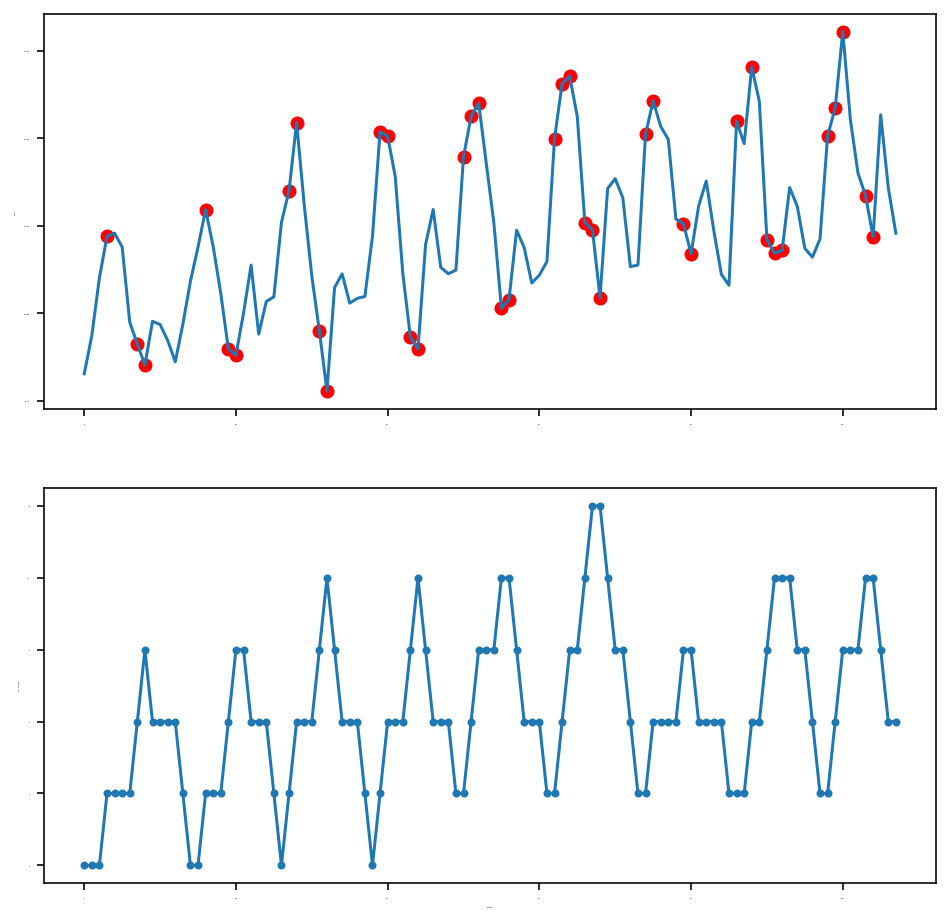

In [7]:
## 일정 구간 동안 피크 발생수를 세기

df['peak-count-6'] = df['peak-average'].rolling(6, min_periods=1).count()

f,(ax1, ax2) = plt.subplots(2, figsize=(8,8))
ax1.plot(df['Sales'])
ax1.scatter(range(len(df)), df['peak-average'],c='r')
ax2.plot(df['peak-count-6'], marker='.')
ax1.set_ylabel("Sales")
ax2.set_ylabel("No. Peaks")
ax2.set_xlabel("Month")
# plt.savefig('p324.pdf')
